# Tutorial 2: Data Preprocessing and Classification Analysis I


## Question 1:  Aggregation

Data aggregation is a preprocessing task where the values of two or more objects are 
combined into a single object. The motivation for aggregation includes 

(a) reducing the size of data to be processed

(b) changing the granularity of analysis (from fine to coarse-scale)

(c) improving the stability of the data.



**<font color="red">Code:Load Dataset</font>**

In [1]:
import pandas as pd
dailyprcp = pd.read_csv('T2Q1_precipitation.csv', header='infer')

dailyprcp

,DATE,PRCP
0,1/1/2001,0.00
1,1/2/2001,0.00
2,1/3/2001,0.00
3,1/4/2001,0.04
4,1/5/2001,0.14
...,...,...
6186,12/27/2017,0.00
6187,12/28/2017,0.00
6188,12/29/2017,0.00
6189,12/30/2017,0.00


In [2]:
from datetime import date
d0=date(2001,1,1)
print (d0)
d1=date(2017,12,31)   
print (d1)
delta=d1-d0
print(delta.days)

2001-01-01
2017-12-31
6208


__There is some missing data!!__

Set the Date to customized for data processing

In [3]:
# index() : function to set one of the columns of DataFrame as the index, i.e. a set of labelsfor rows
dailyprcp.index = pd.to_datetime(dailyprcp['DATE'])
dailyprcp = dailyprcp['PRCP']
dailyprcp


DATE
2001-01-01    0.00
2001-01-02    0.00
2001-01-03    0.00
2001-01-04    0.04
2001-01-05    0.14
              ... 
2017-12-27    0.00
2017-12-28    0.00
2017-12-29    0.00
2017-12-30    0.00
2017-12-31    0.00
Name: PRCP, Length: 6191, dtype: float64

Text(0.5, 1.0, 'Daily Precipitation (variance = 0.053)')

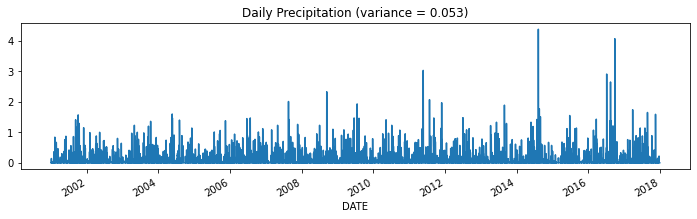

In [4]:
ax = dailyprcp.plot(kind='line',figsize=(12,3))
ax.set_title('Daily Precipitation (variance = %.3f)' % (dailyprcp.var()))

Observation:

1)The daily time series appear to be quite chaotic and varies significantly from one time 
step to another.

2)Variance is small due to similar datavalue.

### (a) Monthly aggregation: The time series can be grouped and aggregated by month to 
### obtain the total monthly precipitation values.


**<font color="red">Code:</font>**

In [5]:
monthlyprcp = dailyprcp.groupby(pd.Grouper(freq='M')).sum()
monthlyprcp 

DATE
2001-01-31    0.84
2001-02-28    2.55
2001-03-31    0.83
2001-04-30    1.27
2001-05-31    3.16
              ... 
2017-08-31    4.22
2017-09-30    1.21
2017-10-31    1.96
2017-11-30    3.05
2017-12-31    0.60
Freq: M, Name: PRCP, Length: 204, dtype: float64

Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

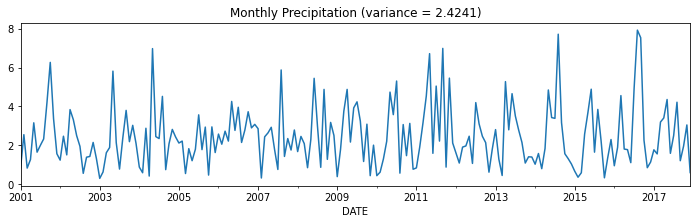

In [6]:
ax = monthlyprcp.plot(kind='line',figsize=(12,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthlyprcp.var()))

Observation:

1)The resulting time series appears to vary more smoothly compared to the daily time series.

2)Variance get bigger as less neighbouring data

### (b) Yearly aggregation: The time series can be grouped and aggregated by year to 
### obtain the total yearly precipitation values.


**<font color="red">Code:</font>**

In [7]:
annualprcp = dailyprcp.groupby(pd.Grouper(freq='Y')).sum()
annualprcp


DATE
2001-12-31    30.04
2002-12-31    23.67
2003-12-31    26.69
2004-12-31    29.15
2005-12-31    23.07
2006-12-31    35.23
2007-12-31    27.95
2008-12-31    30.57
2009-12-31    31.12
2010-12-31    27.21
2011-12-31    41.47
2012-12-31    24.46
2013-12-31    29.64
2014-12-31    31.74
2015-12-31    24.49
2016-12-31    36.75
2017-12-31    29.44
Freq: A-DEC, Name: PRCP, dtype: float64

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

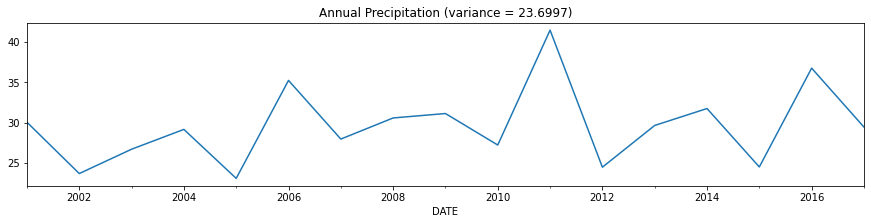

In [8]:
ax = annualprcp.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annualprcp.var()))

Observation:

1)The resulting time series appears to vary more sawtooth compared to the monthly time series.

2)Variance is large as data is sparse

## Question 2:  Sampling

Sampling is an approach commonly used to facilitate 

(a) data reduction for exploratory data analysis and scaling up algorithms to big data 
applications 

(b) quantifying uncertainties due to varying data distributions. There are various methods 
available for data sampling and we will cover

(a)sampling without replacement, where each selected instance is removed from the dataset, 

(b)sampling with replacement, where each selected instance is not removed, thus allowing it
to be selected more than once in the sample.


**<font color="red">Code:  display the first five records of the table for simplicity</font>**


In [9]:
import pandas as pd
data = pd.read_csv('T2Q2_breast_cancer.data', header=None)
data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [10]:
data = data.drop(['Sample code number'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### (a) Sampling without replacement
 
i) A sample of size 7 is randomly selected (without replacement) from the original data.

**<font color="red">Code:</font>**

In [11]:
sample = data.sample(n=7)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
339,8,5,5,5,2,10,4,3,1,4
681,5,10,10,10,4,10,5,6,3,4
192,5,1,1,1,2,1,2,1,1,2
399,1,2,3,1,2,1,1,1,1,2
540,5,1,1,1,2,2,2,1,1,2
405,1,1,1,1,2,1,2,1,1,2
544,2,1,3,2,2,1,2,1,1,2


ii) randomly select 1% of the data (without replacement) and display the selected samples. 
The random_state argument of the function specifies the seed value of the random number 
generator.

**<font color="red">Code:</font>**

In [12]:
sample = data.sample(frac=0.01, random_state=1234)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
341,1,1,1,1,2,1,3,1,1,2
532,1,1,1,1,1,1,3,1,1,2
687,3,1,1,1,2,1,2,3,1,2
83,3,1,1,1,2,2,7,1,1,2
428,1,1,1,1,2,1,2,1,1,2
410,1,1,1,1,2,1,2,1,1,2
446,1,1,1,1,2,1,1,1,1,2


### (b) Sampling with replacement

Finally, we perform a sampling with replacement to create a sample whose size is equal to 1% of the entire data. You should be able to observe duplicate instances in the sample by increasing the sample size.

**<font color="red">Code:</font>**

In [13]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,?,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


## Question 3:  Principal Component Analysis

Principal component analysis (PCA) is a classical method for reducing the number of 
attributes in the data by projecting the data from its original high-dimensional space 
into a lower-dimensional space. The new attributes (also known as components) created by 
PCA have the following properties: 

(1) they are linear combinations of the original attributes, 

(2) they are orthogonal (perpendicular) to each other 

(3) they capture the maximum amount of variation in the data.  

a)PCA on 16 RGB files

i)Load 16 RGB of 111x111 pixels jpeg

ii)Read each image file and convert the RGB image into a 111 x 111 x 3 = 36963 feature values.
This will create a data matrix of size 16 x 36963

(16, 36963)
[[[255 231 191]
  [255 215 174]
  [243 190 148]
  ...
  [253 173 114]
  [250 174 116]
  [249 172 118]]

 [[255 222 183]
  [255 211 171]
  [248 195 151]
  ...
  [253 173 114]
  [251 175 117]
  [251 174 120]]

 [[255 208 168]
  [255 202 161]
  [251 194 151]
  ...
  [249 169 110]
  [247 171 113]
  [248 171 117]]

 ...

 [[178  98  45]
  [186 106  53]
  [189 109  56]
  ...
  [192 129  75]
  [194 131  77]
  [193 130  77]]

 [[189 109  56]
  [199 119  66]
  [194 114  61]
  ...
  [191 125  73]
  [197 134  81]
  [195 132  79]]

 [[197 120  66]
  [211 134  80]
  [198 121  67]
  ...
  [185 119  69]
  [196 130  80]
  [198 132  82]]]


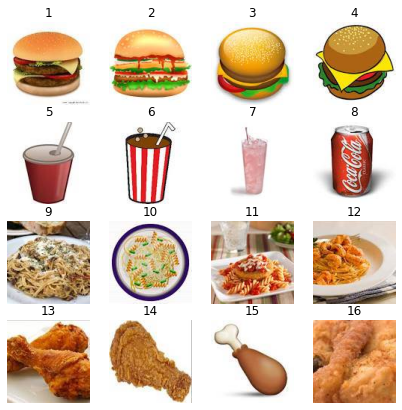

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))
print(imgData.shape)
for i in range(1,numImages+1):
    filename = 'T2Q3_pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])
print(img)

**<font color="red">Code:</font>**

iii) Using PCA, the data matrix is projected to its first two principal components. 
The projected values of the original image data are stored in a pandas DataFrame object 
named projected_1.

**<font color="red">Code:</font>**

In [19]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 4
pca = PCA(n_components=numComponents)
pca.fit(imgData)
projected = pca.transform(imgData)
projected_1 = pd.DataFrame(projected,columns=['pc1','pc2','pc3','pc4'],index=range(1,numImages+1))
projected_1['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected_1

,pc1,pc2,pc3,pc4,food
1,-1592.897979,6651.135632,1755.816966,1928.977091,burger
2,-513.009033,6333.806304,-2276.409240,-75.638458,burger
3,963.271950,7209.134370,-46.300909,-2307.189476,burger
4,2165.072884,9039.318284,3806.206367,-2583.004541,burger
5,-7842.469164,-1064.289985,1676.586043,-1725.647685,drink
6,-8458.903728,-5385.703667,8565.032872,3007.611489,drink
7,-11181.785982,-5359.541798,-3637.580424,-1281.831371,drink
8,-6831.010603,1129.704656,4431.872200,286.891069,drink
9,7639.869662,-5060.125845,-2529.164153,-6291.970710,pasta
10,-704.465989,-532.008500,-2486.054909,-6136.303475,pasta


[49770054.58329947 25447082.40897724 16183817.04992892 15482407.70097529]
106883361.74318092
4


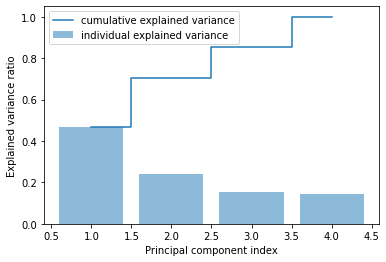

In [20]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(pca.explained_variance_)
print(tot)
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(len(var_exp))
# plot explained variances
plt.bar(range(1,5), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,5), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

4 PC components is sufficent to represent the entire variance of the data. 3 PC is too low 
while 5 PC is too much

iv) Finally, we draw a scatter plot to display the projected values. 

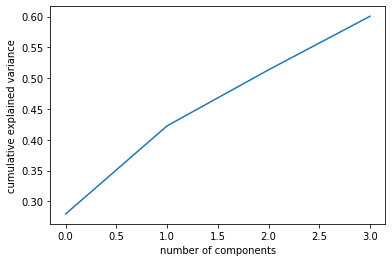

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**<font color="red">Code:</font>**

burger
drink
pasta
chicken


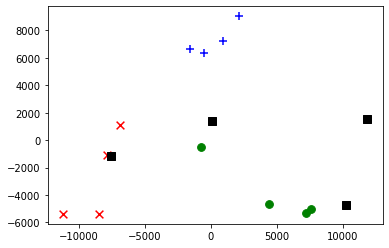

In [22]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    print(foodType)
    d = projected_1[projected_1['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

Observe that the images of burgers, drinks, and pastas  are all projected to the same region. However, the 
images for fried chicken (shown as black squares in the diagram) are harder to discriminate. 